## Wyjaśnianie modelu

In [7]:
from sklearn.datasets import fetch_california_housing
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import shap
import matplotlib.pyplot as plt

In [8]:
housing = fetch_california_housing()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

# Define the model
model = xgb.XGBRegressor()

# Define the parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions on the test set with the best model
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1}
RMSE: 0.4464216695882262


c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
shap_values.shape

(6192, 8)

In [15]:
X_test.shape

(6192, 8)

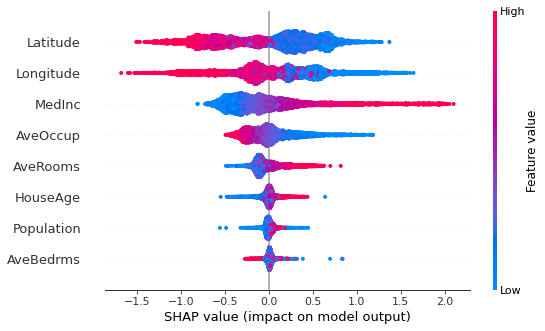

In [10]:
# SHAP explanations
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=housing.feature_names)

In [11]:
# Dependence plot for a specific feature
shap.dependence_plot("Latitude", shap_values, X_test, feature_names=housing.feature_names)

TypeError: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [ ]:

explainer = LimeTabularExplainer(X_train,
feature_names=boston.feature_names,
class_names=['price'],
categorical_features=categorical_features,
mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X_test[25], regressor.predict,
num_features=10)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()